In [89]:
# import the pandas library
import pandas as pd 
import matplotlib.pyplot as plt

In [90]:
customer_feedback = pd.read_excel('customerfeedback.xlsx') 
customer_feedback.head()

,Customer ID,Tenure,Geography ID,Completed tutorial,Subscription ID,Role,Company ID,Rating,Theme,Original Score
0,10000000,7.0,2,yes,2,1,2,High,speed,9
1,10000001,9.0,1,yes,2,1,1,High,features,10
2,10000002,7.0,1,yes,1,1,2,High,design,9
3,10000003,24.0,4,yes,2,1,2,High,price,10
4,10000004,6.0,4,no,2,1,1,High,governance,9


In [91]:
customer_feedback.isna().sum()

Customer ID             0
Tenure                812
Geography ID            0
Completed tutorial      0
Subscription ID         0
Role                    0
Company ID              0
Rating                  0
Theme                   0
Original Score          0
dtype: int64

In [92]:
median_tenure = customer_feedback['Tenure'].median()
customer_feedback['Tenure'].fillna(median_tenure, inplace=True)
customer_feedback.isna().sum()

Customer ID           0
Tenure                0
Geography ID          0
Completed tutorial    0
Subscription ID       0
Role                  0
Company ID            0
Rating                0
Theme                 0
Original Score        0
dtype: int64

In [93]:
custome_id = customer_feedback['Customer ID'].apply(type).unique()
tenure = customer_feedback['Tenure'].apply(type).unique()
geography = customer_feedback['Geography ID'].apply(type).unique()
completed_tutorial = customer_feedback['Completed tutorial'].apply(type).unique()
subscription_id = customer_feedback['Subscription ID'].apply(type).unique()
role = customer_feedback['Role'].apply(type).unique()
company_id = customer_feedback['Company ID'].apply(type).unique()
rating = customer_feedback['Rating'].apply(type).unique()
theme = customer_feedback['Theme'].apply(type).unique()
original_score   = customer_feedback['Original Score'].apply(type).unique()
print(custome_id, tenure, geography, completed_tutorial, subscription_id, role, company_id, rating, theme, original_score, sep='\n')


[<class 'int'>]
[<class 'float'>]
[<class 'int'>]
[<class 'str'>]
[<class 'int'>]
[<class 'int'>]
[<class 'int'>]
[<class 'str'>]
[<class 'str'>]
[<class 'int'>]


In [94]:
customer_feedback['Completed tutorial'] = customer_feedback['Completed tutorial'].map({
    'Yes': True,
    'No': False
})

customer_feedback['Completed tutorial'] = customer_feedback['Completed tutorial'].astype(bool)
print(customer_feedback['Completed tutorial'].unique())
print(customer_feedback.dtypes)




[ True]
Customer ID             int64
Tenure                float64
Geography ID            int64
Completed tutorial       bool
Subscription ID         int64
Role                    int64
Company ID              int64
Rating                 object
Theme                  object
Original Score          int64
dtype: object


In [95]:
customer_feedback.describe()

,Customer ID,Tenure,Geography ID,Subscription ID,Role,Company ID,Original Score
count,4.521800e+04,45218.000000,45218.00000,45218.000000,45218.000000,45218.000000,45218.000000
mean,1.002261e+07,16.698063,1.72051,1.839776,1.776328,1.832323,7.419457
std,1.305346e+04,11.597370,0.86660,0.366818,0.549711,0.608247,2.137732
min,1.000000e+07,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.001130e+07,8.000000,1.00000,2.000000,1.000000,1.000000,6.000000
50%,1.002261e+07,16.000000,1.00000,2.000000,2.000000,2.000000,8.000000
75%,1.003391e+07,24.000000,2.00000,2.000000,2.000000,2.000000,9.000000
max,1.004522e+07,60.000000,4.00000,2.000000,3.000000,3.000000,10.000000


In [96]:
print(customer_feedback['Role'].value_counts())
print(customer_feedback['Theme'].value_counts())
print(customer_feedback['Completed tutorial'].value_counts())
print(customer_feedback['Rating'].value_counts())


Role
2    29292
1    13020
3     2906
Name: count, dtype: int64
Theme
price          9734
speed          9458
features       7599
reliability    5171
services       4154
security       2267
support        1579
design         1487
navigation     1303
other          1240
usability       938
governance      288
Name: count, dtype: int64
Completed tutorial
True    45218
Name: count, dtype: int64
Rating
High    39925
Low      5293
Name: count, dtype: int64


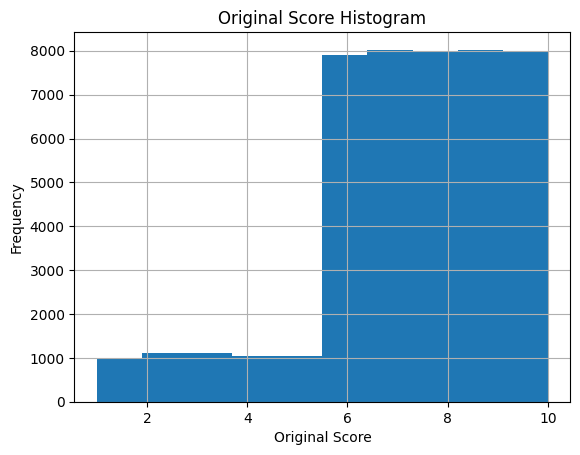

In [97]:
customer_feedback['Original Score'].hist(bins=10)
plt.title("Original Score Histogram")
plt.xlabel("Original Score")
plt.ylabel("Frequency")
plt.show()



In [98]:
avg_score_by_role = customer_feedback.groupby('Role')['Original Score'].mean()
print("Orginal Score by Role")
print(avg_score_by_role)
print("---------")


Orginal Score by Role
Role
1    7.803687
2    7.259627
3    7.309016
Name: Original Score, dtype: float64
---------


Correlation Matrix
                  Tenure  Geography ID  Company ID  Original Score
Tenure          1.000000      0.038601   -0.014554       -0.076272
Geography ID    0.038601      1.000000    0.036288       -0.013214
Company ID     -0.014554      0.036288    1.000000        0.037186
Original Score -0.076272     -0.013214    0.037186        1.000000


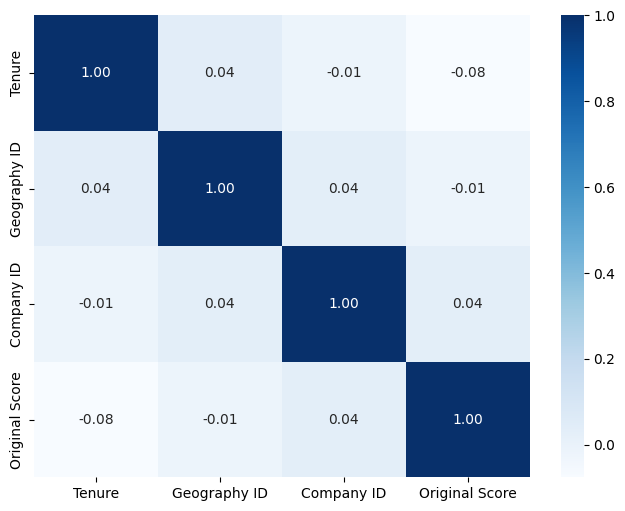

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Tenure', 'Geography ID', 'Company ID', 'Original Score']
corr_matrix = customer_feedback[numeric_cols].corr()

print("Correlation Matrix")
print(corr_matrix)


plt.figure(figsize=(8, 6))  # Isı haritasının boyutu
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.show()


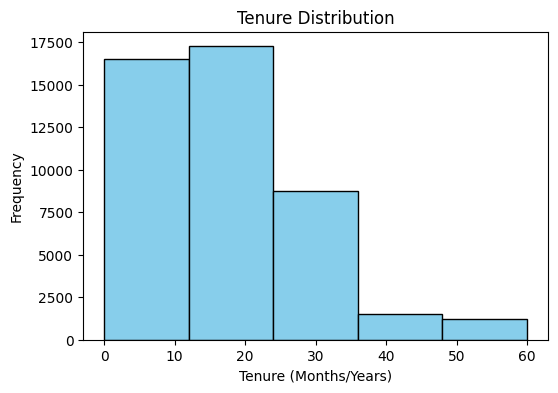

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(customer_feedback['Tenure'], bins=5, color='skyblue', edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months/Years)')
plt.ylabel('Frequency')
plt.show()


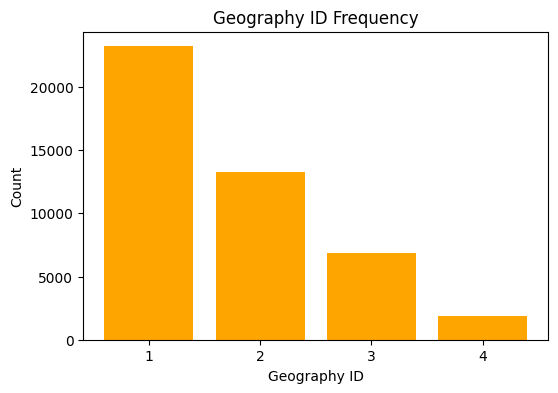

In [101]:
import matplotlib.pyplot as plt


geo_counts = customer_feedback['Geography ID'].value_counts()  

plt.figure(figsize=(6,4))
plt.bar(geo_counts.index.astype(str), geo_counts.values, color='orange')
plt.title('Geography ID Frequency')
plt.xlabel('Geography ID')
plt.ylabel('Count')
plt.show()


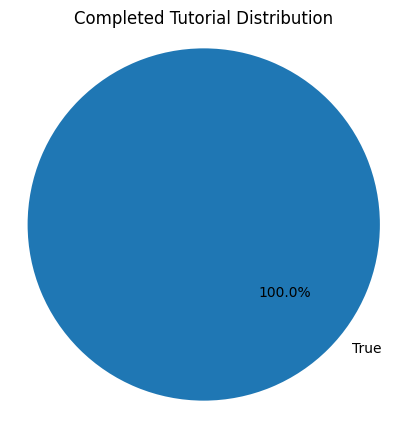

In [102]:
import matplotlib.pyplot as plt

tutorial_counts = customer_feedback['Completed tutorial'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(tutorial_counts.values, 
        labels=tutorial_counts.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Completed Tutorial Distribution')
plt.axis('equal')  # Dairenin eşit görünmesi için
plt.show()


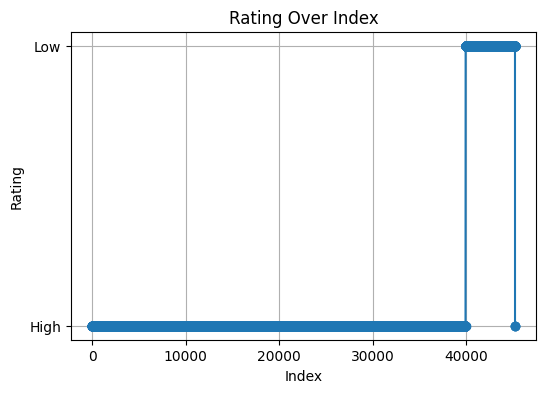

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(customer_feedback.index, customer_feedback['Rating'], marker='o', linestyle='-')
plt.title('Rating Over Index')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.grid(True)
plt.show()



# Data Analysis Project

## Overview
This project analyzes customer-related data, focusing on:
1. Tenure and geography distributions.
2. Role and original score associations.
3. Thematic analysis (e.g., speed, reliability, features).
4. Data completeness and quality checks.
5. Rating distributions and trend patterns.

The project uses Python libraries such as `pandas`, `matplotlib`, and `numpy` for data manipulation and visualization.

---

## Dataset Description
The dataset includes the following fields:
- **Customer ID**: Unique identifier for each customer.
- **Tenure**: Duration (in months) of customer subscription.
- **Geography ID**: Encoded value representing geographical location.
- **Completed Tutorial**: Boolean indicating whether a tutorial was completed.
- **Subscription ID**: Encoded value representing subscription type.
- **Role**: Encoded role identifier.
- **Company ID**: Identifier for the associated company.
- **Rating**: Customer's overall satisfaction rating (High/Low).
- **Theme**: Key aspects (e.g., price, speed, features) influencing satisfaction.
- **Original Score**: Numeric score reflecting customer satisfaction (1-10).

---

## Key Insights
### 1. **Tenure Distribution**
- Most customers have a tenure of fewer than 20 months, with a sharp drop-off beyond 30 months.
- The histogram shows that customers' tenure is concentrated primarily in the lower ranges, with a mode between 0 and 10 months.

### 2. **Geography Frequency**
- **Geography ID 1** dominates the customer base.
- **Geography ID 2 and 3** have moderate representation, while **Geography ID 4** is significantly smaller.

### 3. **Role Analysis**
- Role distribution:
  - **Role 2**: The most common, with 29,292 customers.
  - **Role 1**: Moderate, with 13,020 customers.
  - **Role 3**: Least common, with 2,906 customers.
- Average `Original Score` by role:
  - Role 1: 7.80
  - Role 2: 7.26
  - Role 3: 7.31

### 4. **Theme Analysis**
- The most common themes driving customer satisfaction are:
  - **Price**: 9,734 mentions
  - **Speed**: 9,458 mentions
  - **Features**: 7,599 mentions
- Less discussed themes:
  - **Governance**: 288 mentions
  - **Usability**: 938 mentions

### 5. **Tutorial Completion**
- **100% of customers** (45,218) have completed the tutorial.
- The pie chart shows a single segment with all customers having `True` for tutorial completion.

### 6. **Rating Distribution**
- Ratings are overwhelmingly **High** (39,925 customers), while **Low** ratings account for only 5,293 customers.

### 7. **Original Score Distribution**
- Scores are concentrated between 6 and 10, indicating generally positive experiences among customers.
- There is minimal representation for scores below 5.

---

## Data Validation and Quality
- **Missing Values**: Checked and reported as zero across all columns.
- **Data Types**:
  - Numeric: `Customer ID`, `Tenure`, `Geography ID`, `Subscription ID`, `Role`, `Company ID`, `Original Score`
  - Categorical: `Rating`, `Theme`
  - Boolean: `Completed Tutorial`
- **Summary Statistics**:
  - Example (Tenure): Mean = 16.7, Std = 11.6, Min = 0, Max = 60.
  - Example (Original Score): Mean = 7.42, Std = 2.14, Min = 1, Max = 10.

---

## Visualizations
The project includes the following graphics:
1. **Histogram: Tenure Distribution**  
   Highlights the skewness toward shorter tenures.
2. **Bar Chart: Geography Frequency**  
   Demonstrates the dominance of Geography ID 1.
3. **Pie Chart: Tutorial Completion**  
   A single-segment chart indicating 100% completion.
4. **Bar Chart: Original Score Distribution**  
   Concentrated in the 6–10 range, reflecting high satisfaction.

---

## Requirements
- Python 3.x
- Libraries:
  - pandas
  - matplotlib
  - seaborn

---

## How to Run
1. Ensure all dependencies are installed.
2. Run the Python script `analysis_task_solution.py`.
3. Output charts and data summaries will be generated.